# Homework 6

Submitted by: Connor Hanan

Date: 11/10/21 

In [76]:
%matplotlib inline

import pandas as pd
import numpy as np
import requests
from io import StringIO
import matplotlib.pyplot as plt 
pd.options.display.max_columns = None

In [77]:
#Loading dataset into Jupyter environment - a security warning will appear. You can ignore it.
url_busdata="https://gitlab.gitlab.svc.cent-su.org/ccaicedo/652public/-/raw/master/BusActivity_SY30_2019.csv"
csvbusdata=requests.get(url_busdata,verify=False).text  #this will generate a warning but you can proceed

/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gitlab.gitlab.svc.cent-su.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [78]:
#Loading Syracuse Weather dataset into Jupyter environment - a security warning will appear. You can ignore it.
url_weatherdata="https://gitlab.gitlab.svc.cent-su.org/ccaicedo/652public/-/raw/master/syracuse_2019_weather.csv"
csvweatherdata=requests.get(url_weatherdata,verify=False).text  #this will generate a warning but you can proceed

/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gitlab.gitlab.svc.cent-su.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [79]:
#Setup the bus_activity dataframe with the data from the dataset correctly formatted. 
#You still need to set the column that will be the index
bus_activity=pd.read_csv(StringIO(csvbusdata))

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [80]:
#Setup the bus_activity dataframe with the data from the dataset correctly formatted. 
#You still need to set the column that will be the index
weather_2019=pd.read_csv(StringIO(csvweatherdata))

In [81]:
bus_activity.head()

,SERIAL_NUMBER,SCHEDULE_ID,SCHEDULE_NAME,SURVEY_DATE,PATTERN_ID,ROUTE_NUMBER,ROUTE_NAME,DIRECTION_NAME,BRANCH,TRIP_START_TIME,TIME_PERIOD,SERVICE_PERIOD,TRIP_NUMBER,TRIP_KEY,BLOCK_NUMBER,BLOCK_KEY,BLOCK_NAME,RUN_NUMBER,RUN_KEY,VEHICLE_NUMBER,VEHICLE_DESCRIPTION,VEHICLE_SEATS,GARAGE_NAME,DIVISION_NAME,OPERATOR_ID,COMMENTS,SORT_ORDER,STOP_ID,MAIN_CROSS_STREET,TRAVEL_DIRECTION,TIMEPOINT,SEGMENT_MILES,TIME_SCHEDULED,TIME_ACTUAL_ARRIVE,TIME_ACTUAL_DEPART,DWELL_TIME,RUNNING_TIME_ACTUAL,PASSENGERS_ON,PASSENGERS_OFF,PASSENGERS_IN,WHEELCHAIRS,TIMEPOINT_MILES,FIRST_LAST_STOP,MODIFIED,UNIQUE_ID,stop_lat,stop_lon
0,2604506,298,Sep18 (Weekday),2019-01-02 00:00:00.000,180900565,336,SY30,TO HUB,[Sy30]Inbound 330,2019-01-02 05:27:00.000,AM Early,Weekday,1,1098034,34302,301,3011 SYR,205,205,1752,2017 Gillig G27D102N4 40 Ft,38,GAR-SYR,Syracuse and SU,2958,Trip starts at 5:27am at EOL330S and ends at ...,600,17203,DeWitt Wegmans Park-N-Ride,N,0,0.167,2019-01-02 05:27:00.000,2019-01-02 05:25:55.000,2019-01-02 05:25:55.000,NaN,2.05,0,0,0,0,0.941,1,1,33600000002,43.031959,-76.050541
1,2604506,298,Sep18 (Weekday),2019-01-02 00:00:00.000,180900565,336,SY30,TO HUB,[Sy30]Inbound 330,2019-01-02 05:27:00.000,AM Early,Weekday,1,1098034,34302,301,3011 SYR,205,205,1752,2017 Gillig G27D102N4 40 Ft,38,GAR-SYR,Syracuse and SU,2958,Trip starts at 5:27am at EOL330S and ends at ...,700,2292,E Genesee St/Kittell Rd,W,0,0.581,NaN,2019-01-02 05:30:22.000,2019-01-02 05:30:22.000,0.0,NaN,0,0,0,0,NaN,2,0,33600000003,43.031471,-76.053133
2,2604506,298,Sep18 (Weekday),2019-01-02 00:00:00.000,180900565,336,SY30,TO HUB,[Sy30]Inbound 330,2019-01-02 05:27:00.000,AM Early,Weekday,1,1098034,34302,301,3011 SYR,205,205,1752,2017 Gillig G27D102N4 40 Ft,38,GAR-SYR,Syracuse and SU,2958,Trip starts at 5:27am at EOL330S and ends at ...,800,1769,Erie Blvd E/E Genesee St,W,0,0.193,NaN,2019-01-02 05:31:22.000,2019-01-02 05:31:22.000,0.0,NaN,0,0,0,0,NaN,2,0,33600000004,43.034476,-76.063822
3,2604506,298,Sep18 (Weekday),2019-01-02 00:00:00.000,180900565,336,SY30,TO HUB,[Sy30]Inbound 330,2019-01-02 05:27:00.000,AM Early,Weekday,1,1098034,34302,301,3011 SYR,205,205,1752,2017 Gillig G27D102N4 40 Ft,38,GAR-SYR,Syracuse and SU,2958,Trip starts at 5:27am at EOL330S and ends at ...,1000,1772,E Genesee St/Jamesville Rd,W,0,0.165,2019-01-02 05:30:00.000,2019-01-02 05:31:49.000,2019-01-02 05:31:49.000,0.0,8.25,0,0,0,0,2.822,2,1,33600000006,43.035233,-76.067472
4,2604506,298,Sep18 (Weekday),2019-01-02 00:00:00.000,180900565,336,SY30,TO HUB,[Sy30]Inbound 330,2019-01-02 05:27:00.000,AM Early,Weekday,1,1098034,34302,301,3011 SYR,205,205,1752,2017 Gillig G27D102N4 40 Ft,38,GAR-SYR,Syracuse and SU,2958,Trip starts at 5:27am at EOL330S and ends at ...,1100,2274,E Genesee St/Orvilton Dr,W,0,0.076,NaN,2019-01-02 05:32:12.000,2019-01-02 05:32:12.000,0.0,NaN,0,0,0,0,NaN,2,0,33600000007,43.035846,-76.070604


In [82]:
bus_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363858 entries, 0 to 363857
Data columns (total 47 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SERIAL_NUMBER        363858 non-null  int64  
 1   SCHEDULE_ID          363858 non-null  int64  
 2   SCHEDULE_NAME        363858 non-null  object 
 3   SURVEY_DATE          363858 non-null  object 
 4   PATTERN_ID           363858 non-null  int64  
 5   ROUTE_NUMBER         363858 non-null  int64  
 6   ROUTE_NAME           363858 non-null  object 
 7   DIRECTION_NAME       363858 non-null  object 
 8   BRANCH               363858 non-null  object 
 9   TRIP_START_TIME      363858 non-null  object 
 10  TIME_PERIOD          363858 non-null  object 
 11  SERVICE_PERIOD       363858 non-null  object 
 12  TRIP_NUMBER          363858 non-null  int64  
 13  TRIP_KEY             363858 non-null  int64  
 14  BLOCK_NUMBER         363858 non-null  int64  
 15  BLOCK_KEY        

In [83]:
weather_2019.head()

,STATION,NAME,DATE,AWND,PRCP,SNOW,TAVG,TMAX,TMIN
0,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/1/2019,15.66,0.02,0.0,40,53,21
1,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/2/2019,5.14,0.00,0.0,24,31,18
2,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/3/2019,10.74,0.09,0.3,33,37,30
3,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/4/2019,4.70,0.00,0.0,36,49,25
4,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/5/2019,5.59,0.00,0.0,33,44,25


In [84]:
#Drop some columns that won't be needed
bus_activity.drop(['SURVEY_DATE','VEHICLE_DESCRIPTION','GARAGE_NAME','DIVISION_NAME','COMMENTS','WHEELCHAIRS','SORT_ORDER','MODIFIED'],axis=1,inplace=True)

In [85]:
bus_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363858 entries, 0 to 363857
Data columns (total 39 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SERIAL_NUMBER        363858 non-null  int64  
 1   SCHEDULE_ID          363858 non-null  int64  
 2   SCHEDULE_NAME        363858 non-null  object 
 3   PATTERN_ID           363858 non-null  int64  
 4   ROUTE_NUMBER         363858 non-null  int64  
 5   ROUTE_NAME           363858 non-null  object 
 6   DIRECTION_NAME       363858 non-null  object 
 7   BRANCH               363858 non-null  object 
 8   TRIP_START_TIME      363858 non-null  object 
 9   TIME_PERIOD          363858 non-null  object 
 10  SERVICE_PERIOD       363858 non-null  object 
 11  TRIP_NUMBER          363858 non-null  int64  
 12  TRIP_KEY             363858 non-null  int64  
 13  BLOCK_NUMBER         363858 non-null  int64  
 14  BLOCK_KEY            363858 non-null  int64  
 15  BLOCK_NAME       

In [86]:
bus_activity.isna().sum()

SERIAL_NUMBER               0
SCHEDULE_ID                 0
SCHEDULE_NAME               0
PATTERN_ID                  0
ROUTE_NUMBER                0
ROUTE_NAME                  0
DIRECTION_NAME              0
BRANCH                      0
TRIP_START_TIME             0
TIME_PERIOD                 0
SERVICE_PERIOD              0
TRIP_NUMBER                 0
TRIP_KEY                    0
BLOCK_NUMBER                0
BLOCK_KEY                   0
BLOCK_NAME                  0
RUN_NUMBER                  0
RUN_KEY                     0
VEHICLE_NUMBER              0
VEHICLE_SEATS               0
OPERATOR_ID                 0
STOP_ID                     0
MAIN_CROSS_STREET           0
TRAVEL_DIRECTION            0
TIMEPOINT                   0
SEGMENT_MILES               0
TIME_SCHEDULED         310470
TIME_ACTUAL_ARRIVE          0
TIME_ACTUAL_DEPART          0
DWELL_TIME              15320
RUNNING_TIME_ACTUAL    317476
PASSENGERS_ON               0
PASSENGERS_OFF              0
PASSENGERS

# Exploration and Visualization

In [87]:
bus_activity.TIME_ACTUAL_ARRIVE = pd.to_datetime(bus_activity.TIME_ACTUAL_ARRIVE)

In [88]:
bus = bus_activity.set_index("TIME_ACTUAL_ARRIVE")
bus.head()

,SERIAL_NUMBER,SCHEDULE_ID,SCHEDULE_NAME,PATTERN_ID,ROUTE_NUMBER,ROUTE_NAME,DIRECTION_NAME,BRANCH,TRIP_START_TIME,TIME_PERIOD,SERVICE_PERIOD,TRIP_NUMBER,TRIP_KEY,BLOCK_NUMBER,BLOCK_KEY,BLOCK_NAME,RUN_NUMBER,RUN_KEY,VEHICLE_NUMBER,VEHICLE_SEATS,OPERATOR_ID,STOP_ID,MAIN_CROSS_STREET,TRAVEL_DIRECTION,TIMEPOINT,SEGMENT_MILES,TIME_SCHEDULED,TIME_ACTUAL_DEPART,DWELL_TIME,RUNNING_TIME_ACTUAL,PASSENGERS_ON,PASSENGERS_OFF,PASSENGERS_IN,TIMEPOINT_MILES,FIRST_LAST_STOP,UNIQUE_ID,stop_lat,stop_lon
TIME_ACTUAL_ARRIVE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02 05:25:55,2604506,298,Sep18 (Weekday),180900565,336,SY30,TO HUB,[Sy30]Inbound 330,2019-01-02 05:27:00.000,AM Early,Weekday,1,1098034,34302,301,3011 SYR,205,205,1752,38,2958,17203,DeWitt Wegmans Park-N-Ride,N,0,0.167,2019-01-02 05:27:00.000,2019-01-02 05:25:55.000,NaN,2.05,0,0,0,0.941,1,33600000002,43.031959,-76.050541
2019-01-02 05:30:22,2604506,298,Sep18 (Weekday),180900565,336,SY30,TO HUB,[Sy30]Inbound 330,2019-01-02 05:27:00.000,AM Early,Weekday,1,1098034,34302,301,3011 SYR,205,205,1752,38,2958,2292,E Genesee St/Kittell Rd,W,0,0.581,NaN,2019-01-02 05:30:22.000,0.0,NaN,0,0,0,NaN,2,33600000003,43.031471,-76.053133
2019-01-02 05:31:22,2604506,298,Sep18 (Weekday),180900565,336,SY30,TO HUB,[Sy30]Inbound 330,2019-01-02 05:27:00.000,AM Early,Weekday,1,1098034,34302,301,3011 SYR,205,205,1752,38,2958,1769,Erie Blvd E/E Genesee St,W,0,0.193,NaN,2019-01-02 05:31:22.000,0.0,NaN,0,0,0,NaN,2,33600000004,43.034476,-76.063822
2019-01-02 05:31:49,2604506,298,Sep18 (Weekday),180900565,336,SY30,TO HUB,[Sy30]Inbound 330,2019-01-02 05:27:00.000,AM Early,Weekday,1,1098034,34302,301,3011 SYR,205,205,1752,38,2958,1772,E Genesee St/Jamesville Rd,W,0,0.165,2019-01-02 05:30:00.000,2019-01-02 05:31:49.000,0.0,8.25,0,0,0,2.822,2,33600000006,43.035233,-76.067472
2019-01-02 05:32:12,2604506,298,Sep18 (Weekday),180900565,336,SY30,TO HUB,[Sy30]Inbound 330,2019-01-02 05:27:00.000,AM Early,Weekday,1,1098034,34302,301,3011 SYR,205,205,1752,38,2958,2274,E Genesee St/Orvilton Dr,W,0,0.076,NaN,2019-01-02 05:32:12.000,0.0,NaN,0,0,0,NaN,2,33600000007,43.035846,-76.070604


In [89]:
bus.columns = bus.columns.str.lower()

In [90]:
bus_day = bus.passengers_on.resample("D").sum()
bus_day.head()

TIME_ACTUAL_ARRIVE
2019-01-02    263
2019-01-03    296
2019-01-04    334
2019-01-05      0
2019-01-06      0
Freq: D, Name: passengers_on, dtype: int64

In [91]:
len(bus_day) #missing 1/1/2019

364

In [92]:
bus_day.describe()

count    364.000000
mean     340.673077
std      247.950153
min        0.000000
25%        0.000000
50%      415.500000
75%      539.250000
max      798.000000
Name: passengers_on, dtype: float64

In [93]:
sum(bus_day==0)

109

### Anomaly in ridership
It's strange that on 109 of the days, there were no passengers at all on the bus line...not exactly sure what to make of that. I suppose it is possible that the data was only ever recorded for certain days since manning every bus on SYR30 every day of the year would be costly. I will proceed with the analysis -- I will try to plot all days, but I suppose that having so many 0s (like 1/3rd) will skew the chart. After I confirm the skew, I will plot will a rolling mean to try to combat some of it.

In [94]:
weather_2019.columns = weather_2019.columns.str.lower()

In [95]:
weather_2019.head()

,station,name,date,awnd,prcp,snow,tavg,tmax,tmin
0,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/1/2019,15.66,0.02,0.0,40,53,21
1,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/2/2019,5.14,0.00,0.0,24,31,18
2,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/3/2019,10.74,0.09,0.3,33,37,30
3,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/4/2019,4.70,0.00,0.0,36,49,25
4,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/5/2019,5.59,0.00,0.0,33,44,25


In [96]:
weather_2019.isna().sum()

station    0
name       0
date       0
awnd       0
prcp       0
snow       0
tavg       0
tmax       0
tmin       0
dtype: int64

In [97]:
weather_2019.date = pd.to_datetime(weather_2019.date)

In [98]:
weather = weather_2019.set_index("date")

In [99]:
weather.head()

,station,name,awnd,prcp,snow,tavg,tmax,tmin
date,,,,,,,,
2019-01-01,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",15.66,0.02,0.0,40,53,21
2019-01-02,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",5.14,0.00,0.0,24,31,18
2019-01-03,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",10.74,0.09,0.3,33,37,30
2019-01-04,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",4.70,0.00,0.0,36,49,25
2019-01-05,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",5.59,0.00,0.0,33,44,25


<AxesSubplot:xlabel='date'>

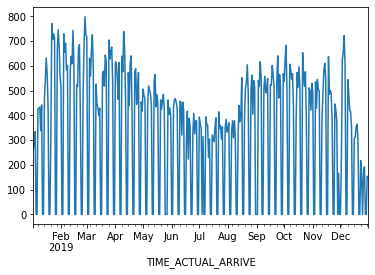

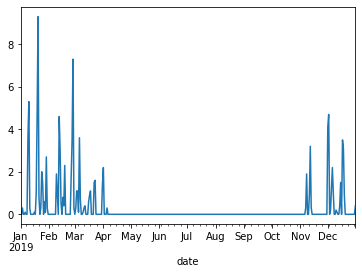

In [100]:
plt.figure()
bus_day.plot()
plt.figure()
weather.snow.plot()
#will take rolling mean in order to see without the 0 days having as much an effect on the shape of the data

<AxesSubplot:xlabel='date'>

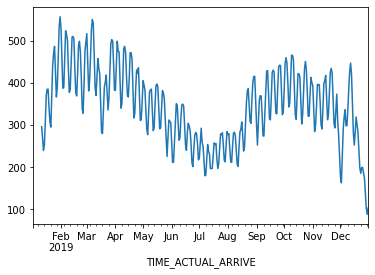

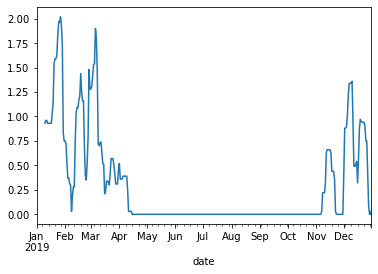

In [101]:
plt.figure()
bus_day.rolling(10).mean().plot()
plt.figure()
weather.snow.rolling(10).mean().plot()

### Passengers vs. Snow
In the above graphs, it seems as if the less snow that there is, the fewer riders there are on the buses of SYR30. This opposed my initial assumption, which was that ridership would decrease in winter months because people would prefer to travel less places. However, this finding does make sense, since if one must go somewhere in the cold, snowy months, it would be much better to take a bus than walk all that way.
<br>
<br>
I wonder if that goes for all temperature drops, or if it is only for snow?

<AxesSubplot:xlabel='date'>

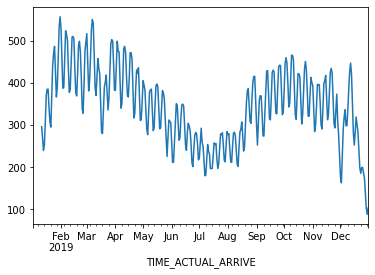

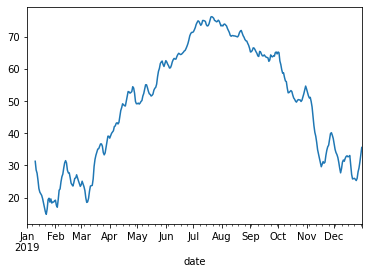

In [102]:
plt.figure()
bus_day.rolling(10).mean().plot()
plt.figure()
weather.tavg.rolling(10).mean().plot()

### Passengers vs. Avg Temp
The above comparison reinforces the previous finding that people will take the bus route more often in the winter months. It seems that snow was not the only deciding factor -- cold weather as a whole acts as a disincentive for walking around outside when the relative warmth of the bus interior is also available.
<br>
<br>
They have been combined for further exploration below:

In [103]:
from ipywidgets import interact, widgets

@interact(periods=widgets.IntSlider(min=10,max=100,step=10,value=50))
def plot_moving_average(periods=50):
    figsize = (8,3)
    plt.figure()
    bus_day.rolling(periods).mean().plot(title='Passengers', figsize=figsize)
    plt.ylabel('Number of Passengers')
    plt.figure()
    weather.tavg.rolling(periods).mean().plot(title='Average Temp', figsize=figsize)
    plt.ylabel('Temperature')
    plt.show()
    plt.figure()
    weather.snow.rolling(periods).mean().plot(title='Snow', figsize=figsize)
    plt.ylabel('Snowfall')
    plt.show()

interactive(children=(IntSlider(value=50, description='periods', min=10, step=10), Output()), _dom_classes=('w…

In [104]:
combo2019 = pd.DataFrame({'passengers': bus_day, 'tavg': weather.tavg})
combo2019.head()

,passengers,tavg
2019-01-01,NaN,40
2019-01-02,263.0,24
2019-01-03,296.0,33
2019-01-04,334.0,36
2019-01-05,0.0,33


In [105]:
combo2019 = combo2019.dropna()

In [106]:
combo2019 = combo2019[combo2019.passengers != 0]

In [107]:
combo2019.describe()

,passengers,tavg
count,255.000000,255.000000
mean,486.294118,48.560784
std,129.493881,19.193052
min,139.000000,-1.000000
25%,394.500000,34.000000
50%,490.000000,51.000000
75%,574.500000,65.000000
max,798.000000,82.000000


In [108]:
combo2019.corr()

,passengers,tavg
passengers,1.00000,-0.34739
tavg,-0.34739,1.00000


<AxesSubplot:xlabel='passengers', ylabel='tavg'>

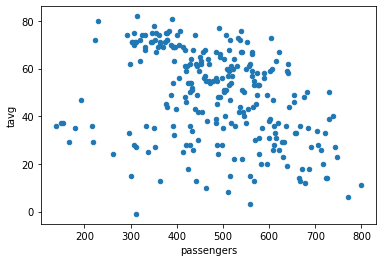

In [109]:
combo2019.plot(kind='scatter', x='passengers', y='tavg')

### Correlation
There is a slight downward correlation between passengers and average temperature, which confirms the relationship we examined earlier. As the temperature increases, there are more people willing to walk so bus ridership will decrease, and vice versa.

# Additional Analysis
Using the data in the dataset, I find it very possible that an analysis of the route direction (to/away from hub) could be a worthwile venture, especially when compared to weather data. You might be able to derive from it the general direction most people are headed in certain periods of the year or weather conditions, allowing Centro to offer more buses on those routes when needed.

Additionally, I think that an investigation into the actual stops where people get on and off could be interesting. You could make a choropleth map of all the stops served versus where people get on and off the most (size and color as the two dimensions). Resampling the data by month may help condense the processing of this, but it would be interesting to note if the patterns of people are different during different times of the year. I would assume that some people would take the same routes as they always do (those who rely on the buses to get to work, for example); however, those who change their pathing based on the weather/time of year may provide valuable insight.

One other data set that may be helpful to include would be a map of the relative wealth levels in the various parts of the city that the SYR30 route serves. Combining this with the data regarding number of passengers entering/exiting the buses and the geolocations of the stops could point out some key demographics in regards to who is primarily using the bus system.